# Controls charts&mdash;individual and moving range (XmR)

# In brevi

Shewhart control charts, also called process behaviour charts, are used to determine if the variation of a process is stable and predictable, that is, in a state of statistical control. In-control variation arises from chance or common causes. No changes or adjustments to the process are needed. The chart can be used to predict future performance. Out-of-control variation arises from special or assignable causes. These charts help identify the special causes in order minimize or eliminate their effect.

# Data

Download the [data file](https://drive.google.com/open?id=0BzrdQfHR2I5DRld4MndVT2R0dEk). It consists of a "Date" column and an "X" column of floats or integers. Dates are entered using [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) date format (yyyy-mm-dd).

# Methodology

The first charts presented here are the individual and moving range control charts, also called XmR or ImR. The data are collected using rational samples. The individual values (sample size is one) are plotted in time order, a central line (average) is plotted, and control limits above and below the central line are plotted.


In [1]:
# Import the required libraries and modules.
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Read the csv data file. It is encoded in UTF-8.
# The values to plot are in column X.
# Set "date" as the index.
chart_data = pd.read_csv('xmr.csv', parse_dates=True, index_col='Date')

In [3]:
# Define for the X chart the graph title and subtitle, and the x and y axis labels.
x_chart_title = 'X Control Chart'
x_chart_subtitle = 'Travel Cost'
x_chart_ylabel = 'Travel Cost (USD)'
x_chart_xlabel = 'Date'
d_two = 1.128
d_three = 0.8525
number_months = 8

In [4]:
# Define for the mR chart the graph title and subtitle, and the x and y axis labels.
mr_chart_title = 'mR Control Chart'
mr_chart_subtitle = 'Travel Cost Difference'
mr_chart_ylabel = 'Travel Cost Moving Range (USD)'
mr_chart_xlabel = 'Date'

In [5]:
# mR chart statistics
# Calculate average range.
average_moving_range = (chart_data['X'].rolling(2) \
                                       .agg(lambda x: x[0] - x[1]) \
                                       .abs()) \
                                       .mean()
average_moving_range

134.14222222222224

In [6]:
# Calculate the range chart upper control limit.
range_chart_upper_control_limit = average_moving_range + average_moving_range * 3 * \
                                  d_three / d_two
range_chart_upper_control_limit

438.28117021276609

In [7]:
# Calculate the range chart lower control limit.
range_chart_lower_control_limit = average_moving_range - average_moving_range * 3 * \
                                  d_three / d_two
range_chart_lower_control_limit

-169.9967257683216

In [8]:
if range_chart_lower_control_limit < 0:
    range_chart_lower_control_limit = 0
range_chart_lower_control_limit

0

In [9]:
# X chart statistics
# Calculate a column of median values.
# chart_data['Median'] = chart_data['X'].median()
# Calculate the average of all values.
average = chart_data['X'].mean()
average

674.50900000000001

In [10]:
# Calculate the individual chart upper control limit.
individual_chart_upper_control_limit = average + 3 * average_moving_range / d_two
individual_chart_upper_control_limit

1031.2702293144209

In [11]:
# Calculate the individual chart lower control limit.
individual_chart_lower_control_limit = average - 3 * average_moving_range / d_two
individual_chart_lower_control_limit

317.7477706855791

KeyError: 'Average'

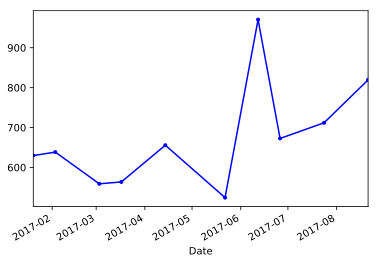

In [12]:
# Create a graph of "individual values v. date".

# Create a single subplot.
# Plot "individual values v. date".
ax = chart_data[['X']].plot.line(legend=False, marker='o', markersize=3, color='blue')
chart_data['Average'].plot.line(legend=False, ax=ax, color='blue').axis('auto')
#chart_data['Monthly average'].plot.line(legend=True, ax=ax).axis('auto')
#chart_data['Median'].plot.line(legend=True, ax=ax).axis('auto')
chart_data['Individual upper control limit'].plot.line(legend=False, ax=ax, \
                                                       color='red').axis('auto')
chart_data['Individual lower control limit'].plot.line(legend=False, ax=ax, \
                                                       color='red').axis('auto')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
ax.set_title(x_chart_title + '\n' + x_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(x_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(x_chart_xlabel)
# Save the graph as svg and pdf.
ax.figure.savefig('x.svg', format='svg')
ax.figure.savefig('x.pdf', format='pdf')

In [ ]:
# Create a graph of "moving range values v. date".

# Create a single subplot.
# Plot "moving range v. date".
ax = chart_data[['MR']].plot.line(legend=False, marker='o', markersize=3, color='blue')
chart_data['Average moving range'].plot.line(legend=False, ax=ax, color='blue').axis('auto')
chart_data['Moving range upper control limit'].plot.line(legend=False, ax=ax, \
                                                       color='red').axis('auto')
chart_data['Moving range lower control limit'].plot.line(legend=False, ax=ax, \
                                                       color='red').axis('auto')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
ax.set_title(mr_chart_title + '\n' + mr_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(mr_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(mr_chart_xlabel)
# Save the graph as svg and pdf.
ax.figure.savefig('mr.svg', format='svg')
ax.figure.savefig('mr.pdf', format='pdf')

# Control chart formulae

## Individuals chart (X)

$$
    \begin{align}
        UCL_X, LCL_X & = \overline{X} \pm 3 \times \text{Sigma(X)} \\
                     & = \overline{X} \pm 3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_2$ can be found in tables of control chart constants. It is a rescaling constant that changes an average range to a standard deviation. The value of $d_2$ changes as the subgroup size n changes. It is common to use a moving range of sample size 2, and for this situation, $d_2$ = 1.128.

## Moving range chart (mR)

$$
    \begin{align}
        UCL_R, LCL_R & = \overline{R} \pm 3 \times \text{Sigma(R)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \text{Sigma(X)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_3$ can be found in tables of control chart constants. It is a rescaling constant that changes a a standard deviation of individual values to a standard deviation of range values. The value of $d_3$ changes as the subgroup size n changes. It is common to use a moving range of sample size 2, and for this situation, $d_3$ = 0.8525.

# Descriptive statistics

## Individual control chart

In [ ]:
print('Upper control limit',
      chart_data['Individual upper control limit'].mean(),
      sep=' = ')
print('Average',
      chart_data['Average'].mean(),
      sep=' = ')
print('Upper control limit',
      chart_data['Individual lower control limit'].mean(),
      sep=' = ')

## Moving range control chart

In [ ]:
print('Upper control limit',
      chart_data['Moving range upper control limit'].mean(),
      sep=' = ')
print('Moving average',
      chart_data['Average moving range'].mean(),
      sep=' = ')                
print('Upper control limit',
      chart_data['Moving range lower control limit'].mean(),
      sep=' = ')

# References

Wheeler, Donald J. 1995. *Advanced Topics in Statistical Process Control*. Knoxville, TN: SPC Press, Inc.

In [ ]:
chart_data['X'].head()

In [ ]:
chart_data['X'].rolling(2)

In [ ]:
chart_data['X'].rolling(3) \
               .agg(lambda x: x[0] - x[1]) \
               .abs()

In [ ]:
df = pd.DataFrame.from_dict({'x1': [1,2,3,4,5],
                        'x2': [3,6,32,5,2],
                        'x3': [12, 23, 43, 11, 34]})
df

In [ ]:
df.mean(axis='columns')

In [ ]:
df.max(axis='columns') - df.min(axis='columns')